<a href="https://colab.research.google.com/github/magomezma-svg/Senales-y-sistemas/blob/main/Copia_de_Taller_2_Punto_2_del_2_6_al_2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $2-Transformada de Laplace$

# 2.6 Consultar y realizar los ejercicios del cuaderno Definición transformada de la Laplace.

**A.** *  Obtener  $X(s)$ junto con su región de convergencia ROC y representar gráficamente la Transformada de Laplace de una señal exponencial compleja causal, así como su diagrama de polos y ceros.

$$SOLUCIÓN$$

### Transformada de Laplace de una señal exponencial causal

La señal es:
$[
x(t) = e^{-s_0 t} \, \epsilon(t)
$]
con \($s_0 = 1 + j $\).

Su transformada de Laplace se obtiene de la forma:
$[
X(s) = \frac{1}{s + s_0}
$]
con región de convergencia:
$[
\Re\{s\} > \Re\{-s_0\}
$]

---

### 🔸 Ilustración en el plano complejo

La magnitud de $( X(s) $), es decir $( |X(s)| $), se representa en el plano $( s = \sigma + j\omega $) para observar cómo cambia según la parte real e imaginaria de \( s \).

Luego, se obtiene y se grafica la ubicación del polo y los ceros de \( X(s) \) para $( s_0 = 1 + j $).

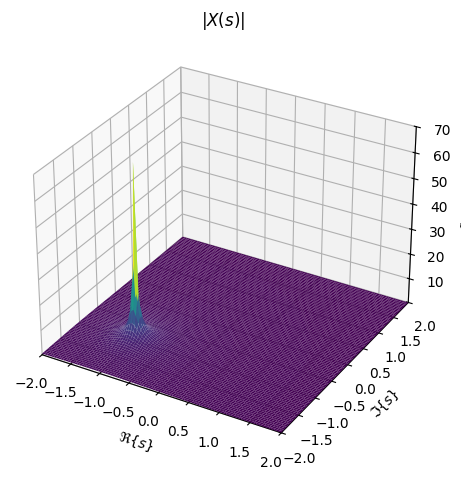

Polos: {-s0: 1}
Ceros: {}


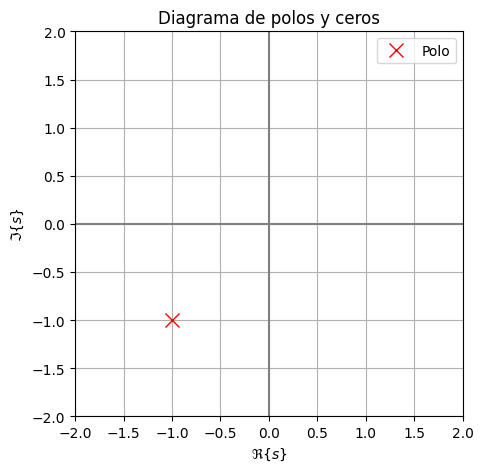

In [1]:
# -------------------------------------------------------------
# Ejercicio 2.6 - Transformada de Laplace de una señal exponencial causal
# Basado en el cuaderno "Definición Transformada de Laplace"
# -------------------------------------------------------------

import sympy as sym
import matplotlib.pyplot as plt

# Declaramos variables simbólicas
sigma, omega = sym.symbols('sigma omega')  # Parte real e imaginaria
s = sym.Symbol('s', complex=True)
s0 = sym.Symbol('s0', complex=True)

# Definición de la Transformada de Laplace de la señal exponencial
X = 1 / (s + s0)

# Sustituimos s = sigma + j*omega y s0 = 1 + j
X1 = X.subs({s: sigma + sym.I*omega, s0: 1 + sym.I})

# -------------------------------------------------------------
# Gráfico 3D de la magnitud |X(s)| en el plano complejo
# -------------------------------------------------------------
sym.plotting.plot3d(
    abs(X1),
    (sigma, -2, 2),
    (omega, -2, 2),
    xlabel=r'$\Re\{s\}$',
    ylabel=r'$\Im\{s\}$',
    title=r'$|X(s)|$'
)

# -------------------------------------------------------------
# Cálculo de polos y ceros
# -------------------------------------------------------------
poles = sym.roots(sym.denom(X), s)   # raíces del denominador
zeros = sym.roots(sym.numer(X), s)   # raíces del numerador

print("Polos:", poles)
print("Ceros:", zeros)

# -------------------------------------------------------------
# Función para graficar polos (x) y ceros (o)
# -------------------------------------------------------------
def pole_zero_plot(poles, zeros):
    plt.figure(figsize=(5,5))
    for p in poles:
        plt.plot(complex(p).real, complex(p).imag, 'rx', markersize=10, label='Polo')
    for z in zeros:
        plt.plot(complex(z).real, complex(z).imag, 'bo', markersize=10, label='Cero')
    plt.axhline(0, color='gray')
    plt.axvline(0, color='gray')
    plt.axis([-2, 2, -2, 2])
    plt.xlabel(r'$\Re\{s\}$')
    plt.ylabel(r'$\Im\{s\}$')
    plt.title('Diagrama de polos y ceros')
    plt.grid(True)
    plt.legend()
    plt.show()

# -------------------------------------------------------------
# Sustituimos s0 = 1 + j y graficamos los polos y ceros
# -------------------------------------------------------------
X2 = X.subs(s0, 1 + sym.I)
pole_zero_plot(sym.roots(sym.denom(X2), s), sym.roots(sym.numer(X2), s))

# 2.7 Consultar y realizar los ejercicios del cuaderno Propiedades básicas transformada de la Laplace.

**Ejercicio**

* Determinar los polos y ceros de la transformada de Laplace $\mathsf{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \}$ mediante el cálculo manual y extendiendo el ejemplo anterior. Qué simetría muestran los polos y los ceros en el plano $s$?

$$SOLUCIÓN$$

**Señal.** $(x(t)=u(t)\sin(\omega_0 t)$)

**Transformada unilateral:**
$[
X(s)=\int_{0}^{\infty}\sin(\omega_0 t)\,e^{-st}\,dt
= \frac{\omega_0}{s^2+\omega_0^2}, \qquad \Re\{s\}>0
$]

**Polos y ceros.**
- Denominador $(s^2+\omega_0^2=(s-j\omega_0)(s+j\omega_0)$)  
  $(\Rightarrow$) **polos** en $(s=\pm j\omega_0$).
- El numerador es constante $(\omega_0\neq 0$)  
  $(\Rightarrow$) **no hay ceros finitos** (cero en $(s=\infty$)).

**ROC.** $(\Re\{s\}>0$) (señal causal limitada en amplitud).

**Simetría (señales reales).**
Como $(x(t)\in\mathbb{R}$), se cumple $(X(s)=X^*(s^*)$).  
Consecuencias:
- Polos y ceros aparecen en **pares conjugados** respecto al eje real.  
- $(\Re\{X(s)\}$) es par en $(s\mapsto -s$) y $(\Im\{X(s)\}$) es impar.  
- $(|X(s)|=|X(-s)|$) y la fase satisface $(\varphi(s)=-\varphi(-s)$).

Se puede decir que para $(u(t)\sin(\omega_0 t)$) los **polos** están en $(s=\pm j\omega_0$) (simétricos conjugados) y **no hay ceros** en el plano finito; la **ROC** es $(\Re\{s\}>0$).


X(s) = w0/(s**2 + w0**2)
ROC: Re{s} > 0 (señal causal acotada)

Ceros (finítos): {}
Polos: {-I*w0: 1, I*w0: 1}


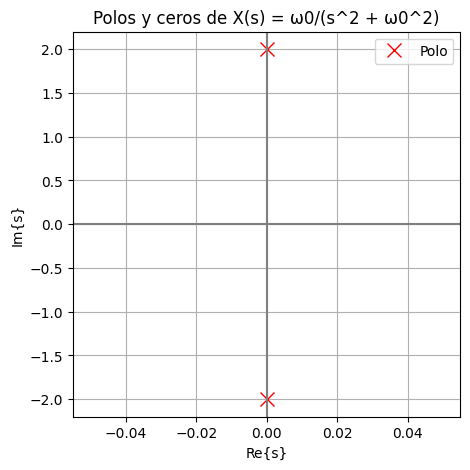


Simetría X(s) = conj(X(conj(s))) verificada: True


In [2]:
# -------------------------------------------------------------
# 2.7 - Polos/ceros de L{u(t)·sin(ω0 t)} y verificación de simetrías
# -------------------------------------------------------------
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# Símbolos
t = sym.symbols('t', real=True, positive=True)
s = sym.symbols('s', complex=True)
w0 = sym.symbols('w0', positive=True, real=True)
u = sym.Heaviside

# Señal y transformada de Laplace
x = sym.sin(w0*t) * u(t)
X = sym.laplace_transform(x, t, s, noconds=True)   # ω0 / (s^2 + ω0^2)

print("X(s) =", sym.simplify(X))
print("ROC: Re{s} > 0 (señal causal acotada)")

# Polos y ceros simbólicos
num = sym.together(sym.simplify(X)).as_numer_denom()[0]
den = sym.together(sym.simplify(X)).as_numer_denom()[1]

ceros = sym.roots(sym.factor(num), s)   # dicc {raiz: multiplicidad}
polos = sym.roots(sym.factor(den), s)

print("\nCeros (finítos):", ceros)
print("Polos:", polos)

# Diagrama de polos y ceros para un ω0 numérico (ej.: ω0 = 2)
w0_val = 2
polos_eval = [complex(p.evalf(subs={w0: w0_val})) for p in list(polos.keys())]
ceros_eval = [complex(z.evalf(subs={w0: w0_val})) for z in list(ceros.keys())]

plt.figure(figsize=(5,5))
for p in polos_eval:
    plt.plot(p.real, p.imag, 'rx', markersize=10, label='Polo')
for z in ceros_eval:
    plt.plot(z.real, z.imag, 'bo', markersize=10, label='Cero')
# Ejes y formato
plt.axhline(0, color='gray'); plt.axvline(0, color='gray')
plt.xlabel('Re{s}'); plt.ylabel('Im{s}')
plt.title('Polos y ceros de X(s) = ω0/(s^2 + ω0^2)')
plt.grid(True)
# Evitar duplicar etiquetas si no hay ceros
handles, labels = plt.gca().get_legend_handles_labels()
labels_unique = dict(zip(labels, handles))
plt.legend(labels_unique.values(), labels_unique.keys())
plt.show()

# --- Comprobación rápida de simetría para señal real: X(s) = conj(X(conj(s))) ---
# Tomamos puntos aleatorios s en el semiplano derecho y verificamos
rng = np.random.default_rng(0)
samples = []
ok = True
for _ in range(5):
    sig = rng.uniform(0.2, 3.0)     # Re{s} > 0
    omg = rng.uniform(-5.0, 5.0)
    sval = sig + 1j*omg
    X_fun = sym.lambdify((s, w0), X, 'numpy')
    a = X_fun(sval, w0_val)
    b = np.conj(X_fun(np.conj(sval), w0_val))
    samples.append((sval, a, b))
    ok = ok and np.allclose(a, b, atol=1e-10)
print("\nSimetría X(s) = conj(X(conj(s))) verificada:", ok)


# 2.8 Demuestre las siguientes propiedades (sin utilizar tablas de propiedades):

$$SOLUCIÓN$$

Usaré la transformada unilateral:
$[
\mathcal{L}\{x(t)\} \;=\; X(s) \;=\; \int_{0}^{\infty} x(t)\,e^{-s t}\,dt,
\quad \text{con } \Re\{s\}\text{ en la ROC adecuada.}
$]

---

### (i) Desplazamiento en el tiempo
 **$(\;\mathcal{L}\{x(t-t_0)\,u(t-t_0)\} = e^{-s t_0}\,X(s)$), con $(t_0>0$).**

**Demostración (definición + cambio de variable):**
1. Parto de la definición:
   $[
   \mathcal{L}\{x(t-t_0)u(t-t_0)\}=\int_{0}^{\infty} x(t-t_0)u(t-t_0)\,e^{-s t}\,dt.
   $]
2. Como \(u(t-t_0)=0\) si \(t<t_0\), el integral efectivo arranca en \(t_0\):
   $[
   =\int_{t_0}^{\infty} x(t-t_0)\,e^{-s t}\,dt.
   $]
3. Sustituyo \(\tau=t-t_0\) \(\Rightarrow\) \(t=\tau+t_0\), \(dt=d\tau\):
   $[
   =\int_{0}^{\infty} x(\tau)\,e^{-s(\tau+t_0)}\,d\tau
   =e^{-s t_0}\int_{0}^{\infty} x(\tau)\,e^{-s \tau}\,d\tau
   =e^{-s t_0}\,X(s).
   $]

**ROC (comentario breve):** el factor $(e^{-s t_0}$) no cambia la forma del semiplano de convergencia; la causalidad se garantiza con $(u(t-t_0)$).

---

### (ii) Escalamiento temporal
 **$(\;\mathcal{L}\{x(a t)\} = \dfrac{1}{|a|}\,X\!\left(\dfrac{s}{a}\right)$), con $(a\neq 0$).**

**Demostración (definición + sustitución):**
1. Definición:
   $[
   \mathcal{L}\{x(a t)\}=\int_{0}^{\infty} x(a t)\,e^{-s t}\,dt.
   $]
2. Tomo $(u=a t$) $(\Rightarrow$) $(du=a\,dt$). Para $(a>0$), cuando $(t:0\to\infty$) entonces $(u:0\to\infty$) y $(dt=du/a$):
   $[
   =\int_{0}^{\infty} x(u)\,e^{-(s/a)u}\,\frac{du}{a}
   =\frac{1}{a}\,X\!\left(\frac{s}{a}\right).
   $]
3. Si $(a<0$), los límites invierten el sentido; el resultado final queda con $(1/|a|$).

**ROC (comentario breve):** el semiplano se “escala” porque $(s$) se reemplaza por $(s/a$).

---

### (iii) Derivación en el tiempo
 ** $(\;\mathcal{L}\{x'(t)\} = s\,X(s) - x(0^+)$).
> Si la condición inicial es nula ($(x(0^+)=0$)), resulta $(\mathcal{L}\{x'(t)\}=sX(s)$).**

**Demostración (integración por partes):**
1. Desde la definición:
   $[
   \int_{0}^{\infty} x'(t)\,e^{-s t}\,dt.
   $]
2. Integro por partes con $(u=e^{-s t}$), $(dv=x'(t)\,dt$) $(\Rightarrow$) $(du=-s e^{-s t}\,dt$), $(v=x(t)$):
   $[
   =\big[x(t)e^{-s t}\big]_{0}^{\infty} + s\int_{0}^{\infty} x(t)\,e^{-s t}\,dt.
   $]
3. Bajo la ROC, \(x(t)e^{-s t}\to 0\) cuando \(t\to\infty\). Evaluando en \(0^+\) queda \(-x(0^+)\):
   $[
   = -x(0^+) + s\,X(s)
   \;=\; sX(s) - x(0^+).
   $]

**ROC (comentario):** el término de borde en $(\infty$) desaparece cuando $(\Re\{s\}$) está dentro del semiplano de convergencia de $(x(t)$).

---

### (iv) Convolución ↔ producto en $(s$)
 **$(\;\mathcal{L}\{(x*y)(t)\} = X(s)\,Y(s)$), con $((x*y)(t)=\int_{0}^{t} x(\tau)\,y(t-\tau)\,d\tau$).**

**Demostración (definición + cambio de orden de integración):**
1. Aplico la definición a la convolución temporal:
   $[
   \int_{0}^{\infty} \Big(\int_{0}^{t} x(\tau)\,y(t-\tau)\,d\tau\Big) e^{-s t}\,dt.
   $]
2. Con el cambio $(u=t-\tau$) y reordenando la región $((\tau\ge 0,\,u\ge 0)$):
   $[
   =\int_{0}^{\infty}\!\!\int_{0}^{\infty} x(\tau)\,y(u)\,e^{-s(\tau+u)}\,d\tau\,du.
   $]
3. Separa como producto de integrales (Fubini bajo convergencia):
   $[
   =\Big(\int_{0}^{\infty} x(\tau)\,e^{-s \tau}\,d\tau\Big)
    \Big(\int_{0}^{\infty} y(u)\,e^{-s u}\,du\Big)
   \;=\; X(s)\,Y(s).
   $]



# 2.9 Encuentre la transformada de Laplace, dibuje el esquema de polos y ceros y la región de convergencia (ROC), de las siguientes señales:

# i) $e^{-2t}u(t) + e^{-3t}u(t)$  
# ii)  $e^{2t}u(t) + e^{-3t}u(-t)$  
# iii)  $e^{-a|t|}$
# iv) $e^{-2t}[u(t) - u(t-5)]$


$$SOLUCIÓN$$


usamos la Laplace **bilateral** cuando la señal no es estrictamente causal (por ejemplo, cuando aparece $(u(-t)$)).  
> Para $(e^{-s_0 t}\,u(t)$): $(\ \mathcal{L}\{e^{-s_0 t}u(t)\}=\dfrac{1}{s+s_0}$) con ROC $(\Re\{s\}>-\Re\{s_0\}$).  
> Para $(e^{-s_0 t}\,u(-t)$): $(\ \mathcal{L}\{e^{-s_0 t}u(-t)\}=-\dfrac{1}{s+s_0}$) con ROC $(\Re\{s\}<-\Re\{s_0\}$).

---

i) $x_1(t) = e^{-2t}u(t) + e^{-3t}u(t)$


$[
X_1(s)=\frac{1}{s+2}+\frac{1}{s+3}
      =\frac{2s+5}{(s+2)(s+3)}.
$]

- **Polos:** $(s=-2,\ -3$).  
- **Cero(s):** raíz de $(2s+5=0\Rightarrow s=-\tfrac{5}{2}$).  
- **ROC:** intersección de $(\Re\{s\}>-2$) y $(\Re\{s\}>-3$) $(\Rightarrow$) **$(\Re\{s\}>-2$)** (semiplano derecho a partir de $(-2$)).


---

ii) $(x_2(t)=e^{2t}u(t)+e^{-3t}u(-t)$)

**Ojo (posible errata):** en ejercicios de dos lados suele aparecer $(e^{+3t}u(-t)$) (que decae hacia $(t\to -\infty$)). Con el enunciado tal cual, resolvemos ambos casos:

**a) Si el enunciado es tal cual** $(e^{2t}u(t)+e^{-3t}u(-t)$):

$[
\mathcal{L}\{e^{2t}u(t)\}=\frac{1}{s-2},\quad \text{ROC } \Re\{s\}>2.
$]
$[
\mathcal{L}\{e^{-3t}u(-t)\}=-\frac{1}{s+3},\quad \text{ROC } \Re\{s\}< -3.
$]
$[
X_2(s)=\frac{1}{s-2}-\frac{1}{s+3}=\frac{5}{(s-2)(s+3)}.
$]

- **Polos:** $(s=2,\ -3$).  
- **Ceros:** ninguno (numerador constante $(=5$)).  
- **ROC:** intersección de $(\Re\{s\}>2$) y $(\Re\{s\}< -3$) ⇒ **no hay intersección** ⇒ **ROC vacía** (la transformada bilateral no converge en ningún semiplano).  
  > Interpretación: el término $(e^{-3t}u(-t)$) **crece** cuando $(t\to -\infty$); la suma con $(e^{2t}u(t)$) no deja banda de convergencia común.

**b) Si lo correcto era** $(e^{2t}u(t)+e^{+3t}u(-t)$) (caso típico de dos lados con decaimiento a izquierda):

$[
\mathcal{L}\{e^{3t}u(-t)\}=\frac{1}{s+3},\ \ \text{ROC }\Re\{s\}< -3.
$]
$[
X_2(s)=\frac{1}{s-2}+\frac{1}{s+3}=\frac{2s+1}{(s-2)(s+3)}.
$]

- **Polos:** $(s=2,\ -3$).  
- **Cero(s):** $(2s+1=0\Rightarrow s=-\tfrac{1}{2}$).  
- **ROC:** **tira vertical** $(-3<\Re\{s\}<2$).



---

iii) $(x_3(t)=e^{-a|t|}$), con $(a>0$)

Descomposición: $(x_3(t)=e^{-a t}u(t)+e^{a t}u(-t)$).

$[
X_3(s)=\frac{1}{s+a}+\frac{1}{-(s-a)}=\frac{2a}{a^2-s^2}.
$]

- **Polos:** $(s=\pm a$).  
- **Ceros:** ninguno (numerador constante $(2a$)).  
- **ROC:** **tira vertical** $(-a<\Re\{s\}<a$).



---

iv) $(x_4(t)=e^{-2t}\,[\,u(t)-u(t-5)\,]$)  (ventana causal de duración 5)

$[
X_4(s)=\int_{0}^{5} e^{-(s+2)t}\,dt
      =\frac{1-e^{-5(s+2)}}{s+2}.
$]

- **Polos:** **ninguno efectivo.**  
  Hay cancelación: el numerador se anula en $(s=-2$) (con $(k=0$)), que cancela el denominador. El límite en $(s=-2$) es finito $((=5)$).
- **Ceros:** cuando $(1-e^{-5(s+2)}=0\Rightarrow e^{-5(s+2)}=1\Rightarrow s=-2+\jmath \frac{2\pi k}{5},\ k\in\mathbb{Z}$).  
  (Una columna de ceros sobre la recta $(\Re\{s\}=-2$), igualmente espaciados en $(\Im\{s\}$).)
- **ROC:** **todo el plano $(s$)** (función de duración finita ⇒ su Laplace es entera/analítica en $(\mathbb{C}$)).



---




**Esquemas de polos, ceros y ROC**
___

- (i) $(x_1(t)=e^{-2t}u(t)+e^{-3t}u(t)$)  
  $(X_1(s)=\dfrac{2s+5}{(s+2)(s+3)}$). Polos: $(-2,-3$). Cero: $(-2.5$). ROC: $(\Re\{s\}>-2$).

  <br>

- (ii) $(x_2(t)=e^{2t}u(t)+e^{-3t}u(-t)$)  
  **Tal cual**: $(X_2(s)=\dfrac{5}{(s-2)(s+3)}$). Polos: $(2,-3$). Ceros: ninguno. **ROC vacía**.  
  **Versión típica** $(e^{2t}u(t)+e^{3t}u(-t)$): $(X_2(s)=\dfrac{2s+1}{(s-2)(s+3)}$). Polos: $(2,-3$). Cero: $(-0.5$). **ROC**: $(-3<\Re\{s\}<2$).

  <br>

- (iii) $(x_3(t)=e^{-a|t|}$) ($(a>0$))  
  $(X_3(s)=\dfrac{2a}{a^2-s^2}$). Polos: $(\pm a$). Ceros: ninguno. ROC: $(-a<\Re\{s\}<a$).
  
 <br>

- (iv) $(x_4(t)=e^{-2t}\,[u(t)-u(t-5)]$)  
  $(X_4(s)=\dfrac{1-e^{-5(s+2)}}{s+2}$). **Sin polos efectivos** (se cancela en $(s=-2$)).  
  Ceros: $(s=-2+j\,\tfrac{2\pi k}{5}$). **ROC**: todo el plano.


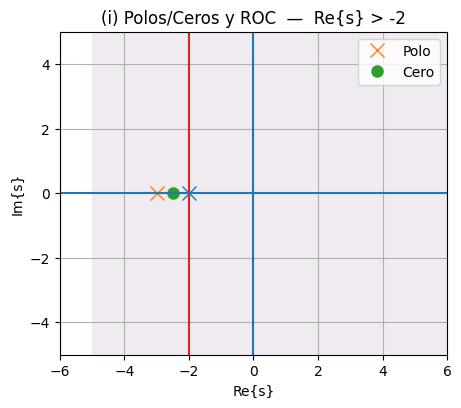

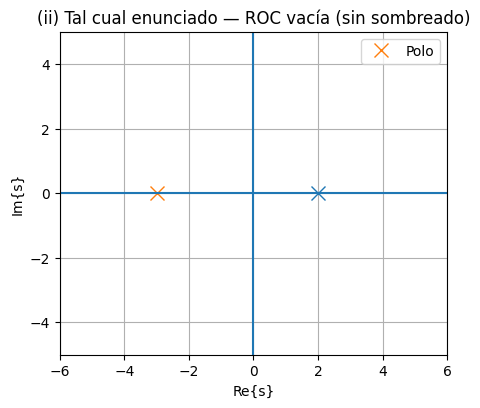

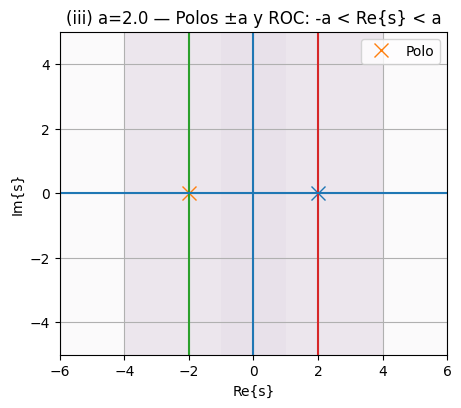

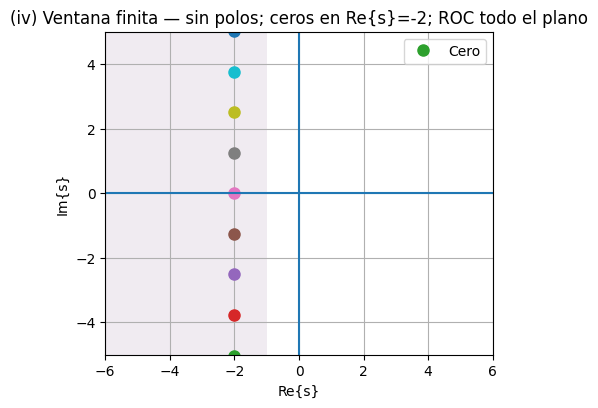

Listo: puedes cambiar 'variant_ii' a 'decaying_left' si esa era la intención del enunciado.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ===== Helper: gráfico de polos/ceros + ROC =====
def pole_zero_plot(poles=None, zeros=None, roc=None, roc_args=None, title=""):
    poles = poles or []
    zeros = zeros or []
    fig, ax = plt.subplots(figsize=(5,5))

    # Polos (x) y ceros (o)
    for p in poles:
        ax.plot(np.real(p), np.imag(p), 'x', markersize=10, label='Polo')
    for z in zeros:
        ax.plot(np.real(z), np.imag(z), 'o', markersize=8, label='Cero')

    # Sombreado de ROC
    if roc == "right":        # Re{s} > sigma0
        sigma0 = roc_args.get("sigma0", 0.0)
        X = np.linspace(sigma0, sigma0+6, 2)
        Y = np.linspace(-5, 5, 2)
        XX, YY = np.meshgrid(X, Y)
        ax.pcolormesh(XX, YY, np.ones_like(XX), alpha=0.08, shading='auto')
        ax.plot([sigma0, sigma0], [-5, 5])
    elif roc == "left":       # Re{s} < sigma0
        sigma0 = roc_args.get("sigma0", 0.0)
        X = np.linspace(sigma0-6, sigma0, 2)
        Y = np.linspace(-5, 5, 2)
        XX, YY = np.meshgrid(X, Y)
        ax.pcolormesh(XX, YY, np.ones_like(XX), alpha=0.08, shading='auto')
        ax.plot([sigma0, sigma0], [-5, 5])
    elif roc == "strip":      # sigmaL < Re{s} < sigmaR
        sigmaL = roc_args.get("sigmaL", -1.0)
        sigmaR = roc_args.get("sigmaR", 1.0)
        # izquierda
        X1 = np.linspace(sigmaL-6, sigmaL, 2)
        Y = np.linspace(-5, 5, 2)
        XX1, YY1 = np.meshgrid(X1, Y)
        ax.pcolormesh(XX1, YY1, np.ones_like(XX1), alpha=0.02, shading='auto')
        ax.plot([sigmaL, sigmaL], [-5, 5])
        # franja central (la ROC)
        X2 = np.linspace(sigmaL, sigmaR, 2)
        XX2, YY2 = np.meshgrid(X2, Y)
        ax.pcolormesh(XX2, YY2, np.ones_like(XX2), alpha=0.08, shading='auto')
        # derecha
        X3 = np.linspace(sigmaR, sigmaR+6, 2)
        XX3, YY3 = np.meshgrid(X3, Y)
        ax.pcolormesh(XX3, YY3, np.ones_like(XX3), alpha=0.02, shading='auto')
        ax.plot([sigmaR, sigmaR], [-5, 5])

    ax.axhline(0); ax.axvline(0)
    ax.set_xlabel('Re{s}'); ax.set_ylabel('Im{s}')
    ax.set_title(title)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-6, 6); ax.set_ylim(-5, 5)
    ax.grid(True)
    # Evitar etiquetas repetidas
    handles, labels = ax.get_legend_handles_labels()
    uniq = dict(zip(labels, handles))
    if uniq:
        ax.legend(uniq.values(), uniq.keys())
    plt.show()

# ---------- (i) e^{-2t}u(t) + e^{-3t}u(t) ----------
poles_i = [-2+0j, -3+0j]
zeros_i = [-2.5+0j]
pole_zero_plot(poles_i, zeros_i, roc="right", roc_args={"sigma0": -2},
               title="(i) Polos/Ceros y ROC  —  Re{s} > -2")

# ---------- (ii) e^{2t}u(t) + e^{-3t}u(-t)  (dos variantes) ----------
variant_ii = "as_written"     # "as_written"  o  "decaying_left"

if variant_ii == "as_written":
    poles_ii = [2+0j, -3+0j]
    zeros_ii = []  # ningún cero
    pole_zero_plot(poles_ii, zeros_ii, roc=None, roc_args=None,
                   title="(ii) Tal cual enunciado — ROC vacía (sin sombreado)")
else:
    poles_ii = [2+0j, -3+0j]
    zeros_ii = [-0.5+0j]
    pole_zero_plot(poles_ii, zeros_ii, roc="strip",
                   roc_args={"sigmaL": -3, "sigmaR": 2},
                   title="(ii) Versión típica — ROC: -3 < Re{s} < 2")

# ---------- (iii) e^{-a|t|} ----------
a_val = 2.0
poles_iii = [a_val+0j, -a_val+0j]
zeros_iii = []  # ninguno
pole_zero_plot(poles_iii, zeros_iii, roc="strip",
               roc_args={"sigmaL": -a_val, "sigmaR": a_val},
               title=f"(iii) a={a_val} — Polos ±a y ROC: -a < Re{{s}} < a")

# ---------- (iv) e^{-2t}[u(t)-u(t-5)] ----------
# Infinidad de ceros: s = -2 + j*2πk/5. Graficamos algunos k.
kmax = 6
zeros_iv = [-2 + 1j*(2*np.pi*k/5) for k in range(-kmax, kmax+1)]
poles_iv = []  # sin polos efectivos (cancelación)
pole_zero_plot(poles_iv, zeros_iv, roc="right", roc_args={"sigma0": -10},  # "right" con sigma0 muy a la izq. para sombrear todo
               title="(iv) Ventana finita — sin polos; ceros en Re{s}=-2; ROC todo el plano")

print("Listo: puedes cambiar 'variant_ii' a 'decaying_left' si esa era la intención del enunciado.")
